# Credit Card Fraud Detection

* Build a machine learning model to identify fraudulent credit card transactions.
* Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
* Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
* Evaluate the model' s performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

Dataset: [dataset.csv](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

# Loading and Exploring the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

# Load the CSV file
path = '/content/drive/MyDrive/CodSoft/Task 5/creditcard.csv'
df = pd.read_csv(path, encoding='latin1')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
non_fraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
non_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


# Exploratory Data Analysis (EDA)

In [ ]:
fraud_counts=df['Class'].value_counts()
print(fraud_counts)

Class
0    284315
1       492
Name: count, dtype: int64


# Data Visualization

# Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Fraud vs Non-Fraud Distribution

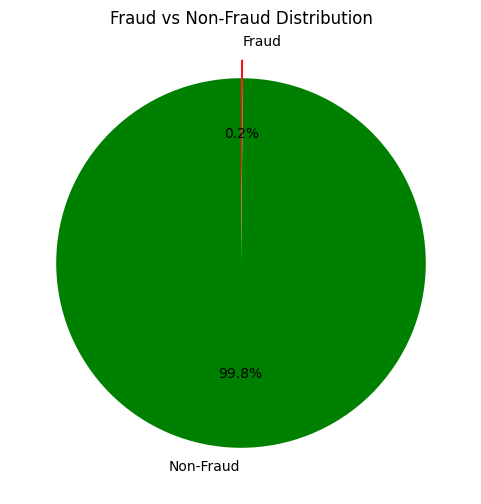

In [ ]:
plt.figure(figsize=(6, 6))
fraud_counts.plot.pie(
    labels=['Non-Fraud', 'Fraud'],
    autopct='%1.1f%%',
    colors=['green', 'red'],
    startangle=90,
    explode=[0, 0.1]
)
plt.title('Fraud vs Non-Fraud Distribution')
plt.ylabel('')
plt.show()

# 3D Scatter Plot of Time, Amount, and V1

In [ ]:
fig = px.scatter_3d(
    df.sample(5000),
    x='Time',
    y='Amount',
    z='V1',
    color='Class',
    color_discrete_map={0: 'green', 1: 'red'},
    labels={'Time': 'Transaction Time', 'Amount': 'Transaction Amount', 'V1': 'Feature V1'},
    title='3D Scatter Plot of Time, Amount, and V1'
)
fig.update_traces(marker=dict(size=3, opacity=0.7))
fig.update_layout(title={'x': 0.5})
fig.show()

# Transaction Amount Distribution by Class

In [ ]:
fig = px.box(df, x='Class', y='Amount', color='Class',
             color_discrete_map={0: 'green', 1: 'red'},
             labels={'Class': 'Transaction Class', 'Amount': 'Transaction Amount'},
             points='all')
fig.update_layout(title={'text': 'Transaction Amount Distribution by Class', 'x': 0.5},
                  xaxis_title='Class (0: Non-Fraud, 1: Fraud)',
                  yaxis_title='Transaction Amount')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Transaction Counts by Hour of Day

In [ ]:
df['Hour'] = (df['Time'] // 3600) % 24

hourly_counts = df.groupby(['Hour', 'Class']).size().reset_index(name='Counts')
fig = px.line(hourly_counts, x='Hour', y='Counts', color='Class',
              color_discrete_map={0: 'green', 1: 'red'},
              labels={'Hour': 'Hour of Day', 'Counts': 'Transaction Counts'},
              title='Transaction Counts by Hour of Day')
fig.update_layout(title={'x': 0.5})
fig.show()

# Transaction Amount vs Time

In [ ]:
fig = px.scatter(df, x='Time', y='Amount', color='Class',
                 color_discrete_map={0: 'green', 1: 'red'},
                 opacity=0.6,
                 labels={'Time': 'Transaction Time', 'Amount': 'Transaction Amount'})
fig.update_layout(title={'text': 'Transaction Amount vs Time', 'x': 0.5},
                  xaxis_title='Time (Seconds)',
                  yaxis_title='Transaction Amount')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Feature Distributions Across Fraud and Non-Fraud

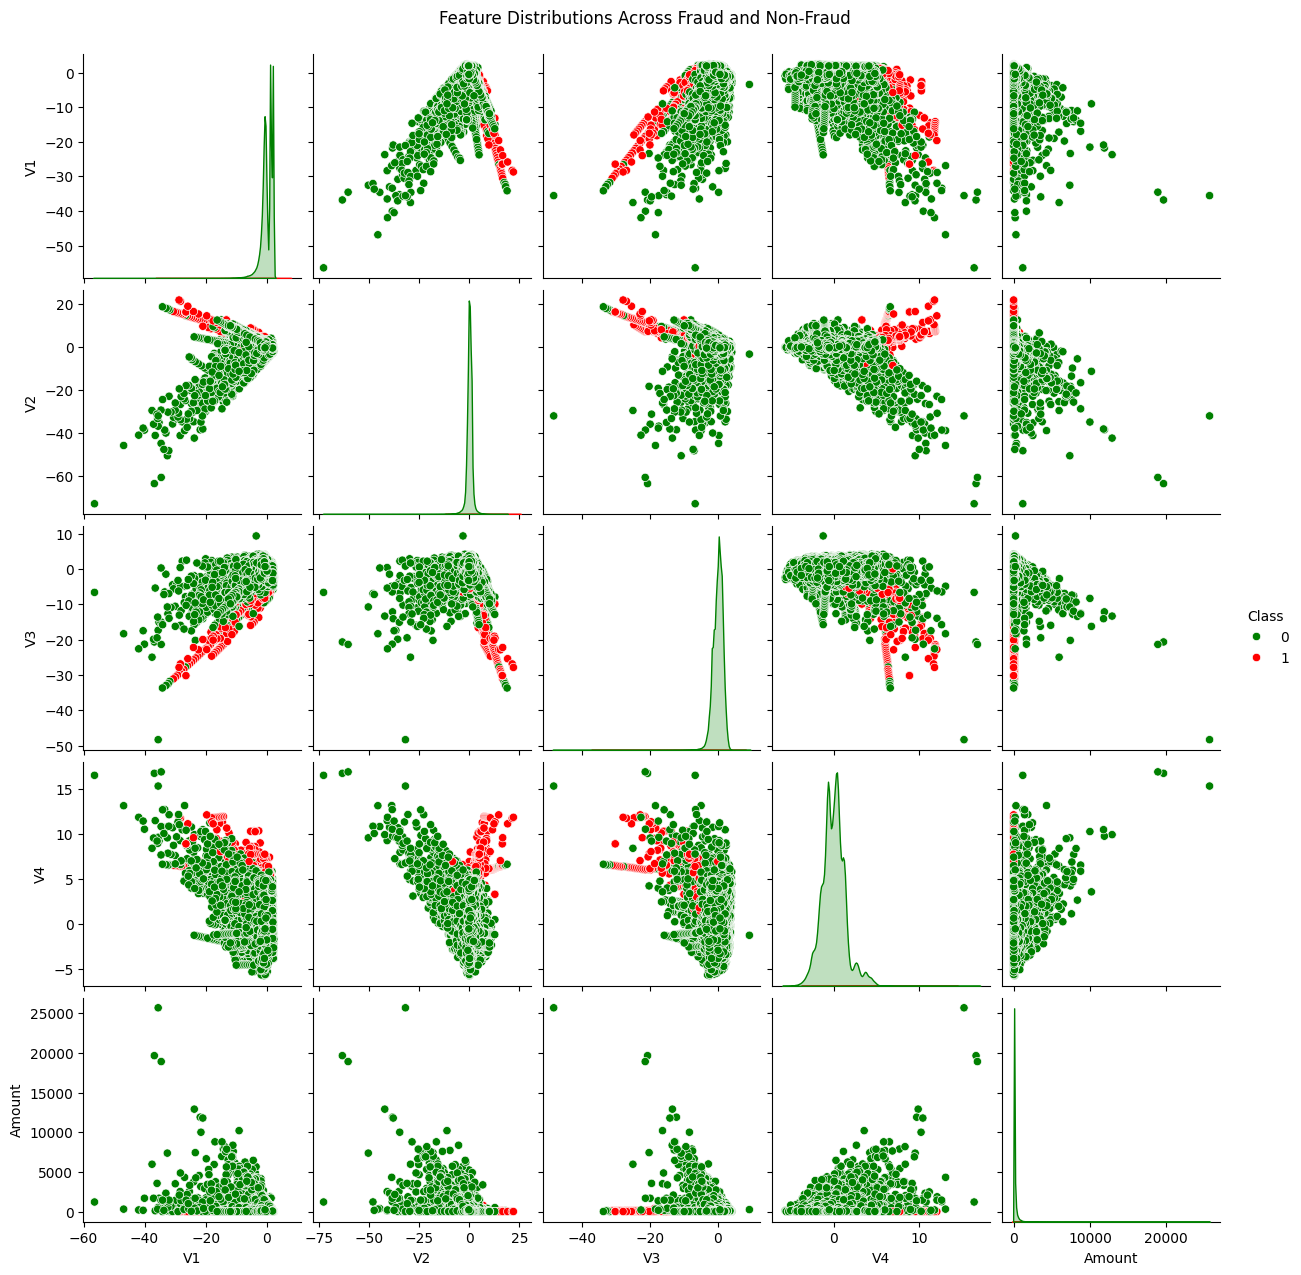

In [ ]:
selected_features = ['V1', 'V2', 'V3', 'V4', 'Amount', 'Class']
sns.pairplot(df[selected_features], hue='Class', palette={0: 'green', 1: 'red'}, diag_kind='kde')
plt.suptitle('Feature Distributions Across Fraud and Non-Fraud', y=1.02)
plt.show()

# Parallel Coordinates: Fraud vs Non-Fraud Patterns

In [ ]:
fig = px.parallel_coordinates(
    df,
    dimensions=['Time', 'Amount', 'V1', 'V2'],
    color='Class',
    color_continuous_scale=['green', 'red'],
    labels={'Class': 'Transaction Class', 'Time': 'Transaction Time', 'Amount': 'Transaction Amount'},
    title='Parallel Coordinates: Fraud vs Non-Fraud Patterns'
)
fig.update_layout(title={'x': 0.5})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Feature Correlation Matrix

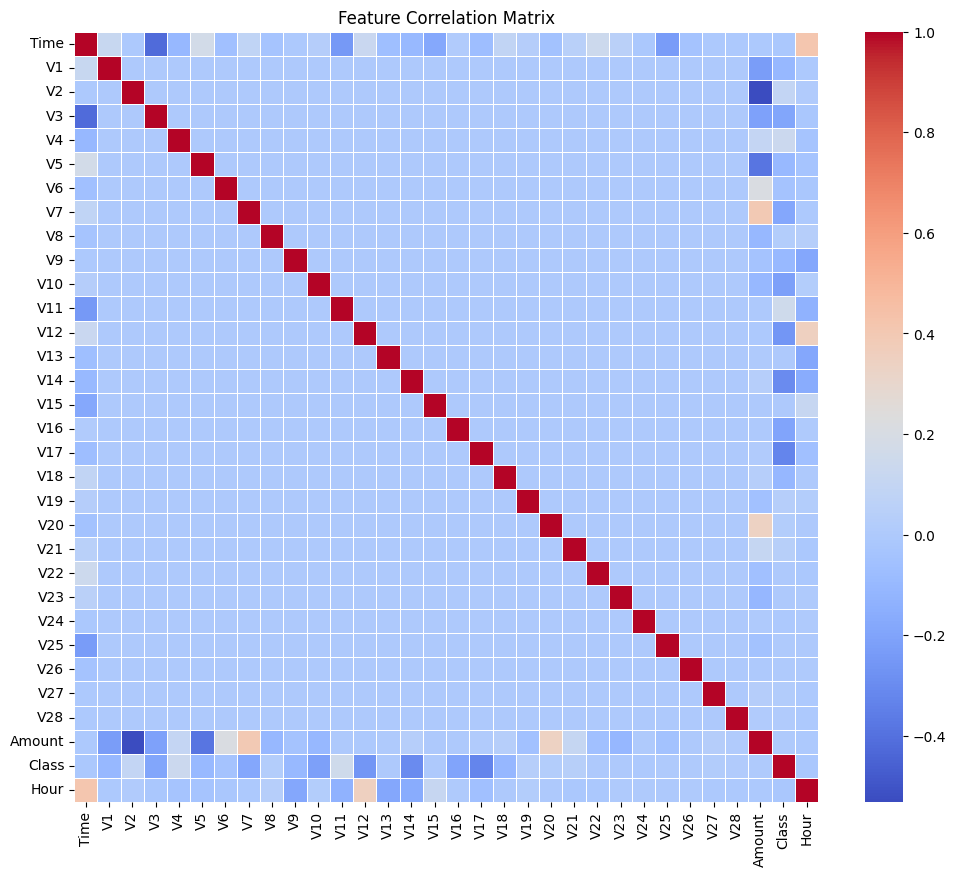

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Correlation Matrix for Fraud Transactions

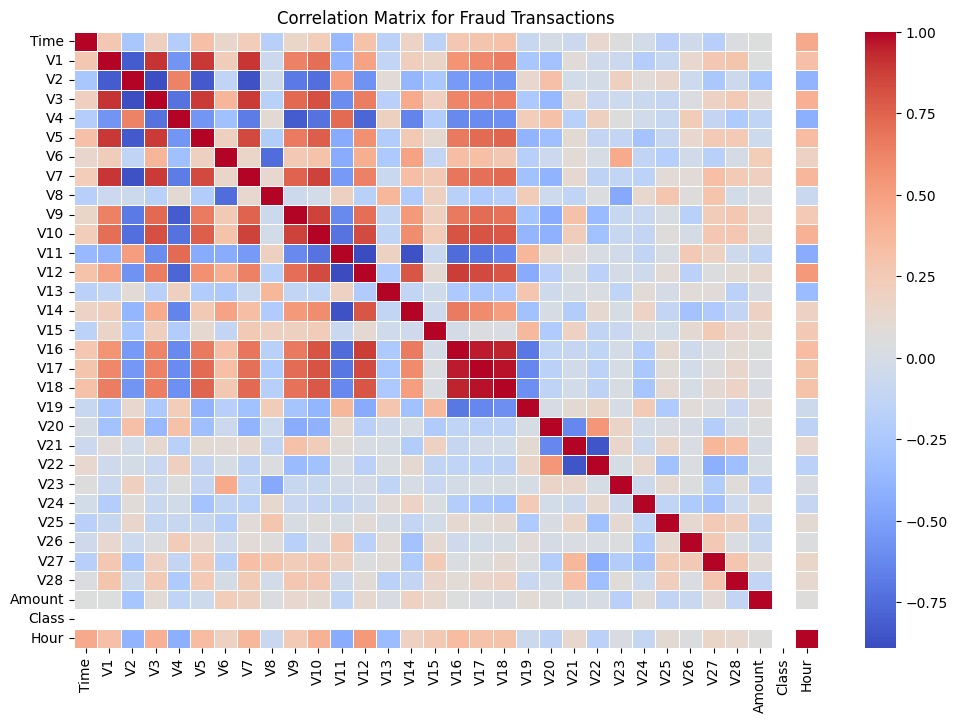

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[df['Class'] == 1].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Fraud Transactions')
plt.show()

# Data Pre-Processing

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



# Model Building

# Logistic Regression

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56750
           1       0.97      0.93      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



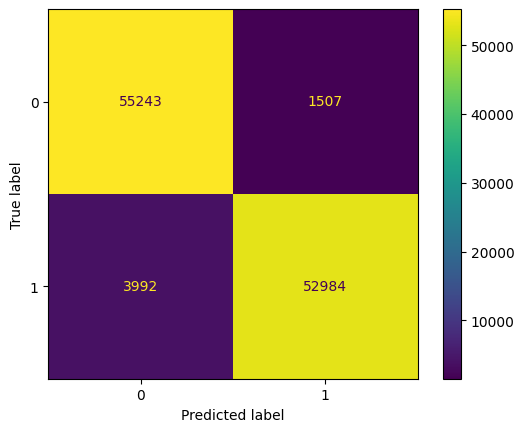

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, lr_predictions))

ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)

# Random Forest Classifier

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



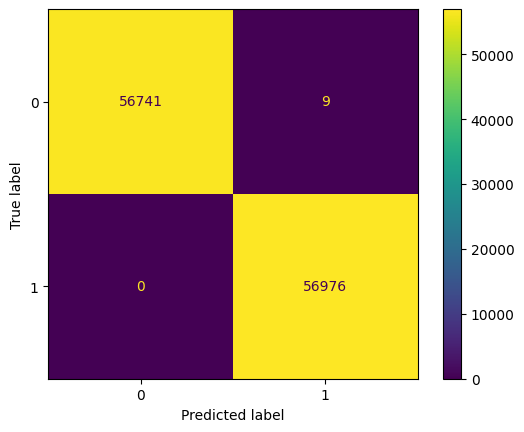

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, rf_predictions))

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)

# ROC Curve Comparison

In [25]:
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=lr_fpr, y=lr_tpr, mode='lines', name=f'Logistic Regression (AUC={lr_auc:.2f})'))
fig.add_trace(go.Scatter(x=rf_fpr, y=rf_tpr, mode='lines', name=f'Random Forest (AUC={rf_auc:.2f})'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))

fig.update_layout(title='ROC Curve Comparison', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

# Evaluation

# Model Performance Comparison

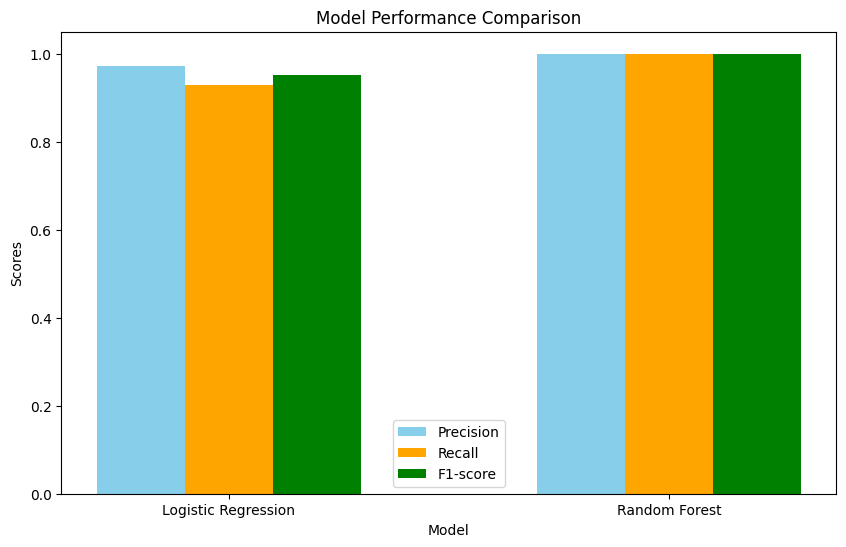

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Precision': [
        precision_score(y_test, lr_predictions),
        precision_score(y_test, rf_predictions)
    ],
    'Recall': [
        recall_score(y_test, lr_predictions),
        recall_score(y_test, rf_predictions)
    ],
    'F1-score': [
        f1_score(y_test, lr_predictions),
        f1_score(y_test, rf_predictions)
    ]
}

x = np.arange(len(metrics['Model']))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width, metrics['Precision'], width, label='Precision', color='skyblue')
plt.bar(x, metrics['Recall'], width, label='Recall', color='orange')
plt.bar(x + width, metrics['F1-score'], width, label='F1-score', color='green')
plt.xticks(x, metrics['Model'])
plt.title('Model Performance Comparison', loc='center')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Select the Best Model

In [27]:
results_df = pd.DataFrame(metrics)
print(results_df)

best_model = 'Random Forest' if metrics['F1-score'][1] > metrics['F1-score'][0] else 'Logistic Regression'
print(f"The best model based on F1-score is: {best_model}")

                 Model  Precision    Recall  F1-score
0  Logistic Regression   0.972344  0.929935  0.950667
1        Random Forest   0.999842  1.000000  0.999921
The best model based on F1-score is: Random Forest
